In [120]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import math
import numpy as np


import gym
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure



In [121]:
NUM_RUNS = 10
EPSILON = 0.9
MIN_BATCH_SIZE = 64    

In [122]:
# Showing hyperparameter edits: Layer Size
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)

layer_size = [1, 2, 4, 8, 16, 24, 48]
for size in layer_size:
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4, size, size, 2])
        target_net = DQN([4, size, size, 2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), lr = 0.02)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < MIN_BATCH_SIZE:
                    transitions = memory.sample(MIN_BATCH_SIZE)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1

            # Decay Epsilon
            EPSILON = EPSILON*0.99


            # Update the target network, copying all weights and biases in DQN
            if i_episode % 20 == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completes all runs for size = ', size, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for 2D Layers of Size = {size}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Layer Size")
    plt.legend(loc = 'upper left')

plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

Starting run 1 of 10


KeyboardInterrupt: 

<Figure size 800x640 with 0 Axes>

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2824
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2909
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2809
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2810
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  3046
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2828
Starting run 7 of 10
episode  50 / 300
e

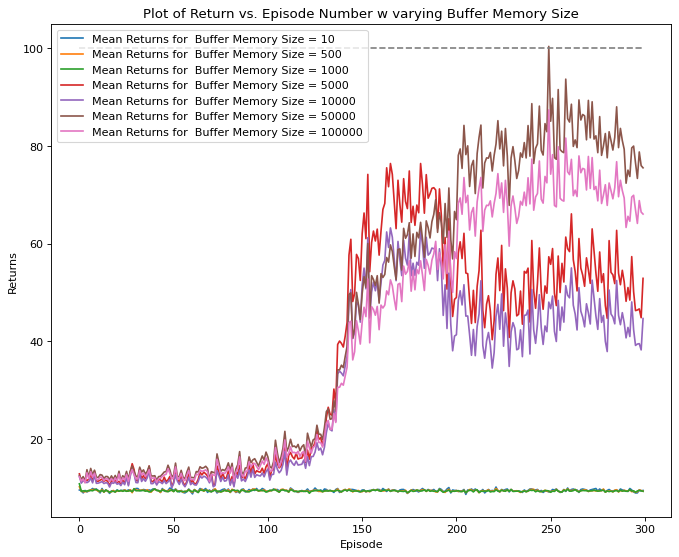

In [ ]:
# Showing hyperparameter edits: Buffer mem
runs_results = []

env = gym.make('CartPole-v1')
buffer_mem = [10, 500, 1000, 5000, 10000, 50000, 100000]
figure(figsize=(10, 8), dpi=80)

for mem in buffer_mem:
    memory = ReplayBuffer(mem)
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4,24,24,2])
        target_net = DQN([4,24,24,2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), lr = 0.02)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < size:
                    transitions = memory.sample(size)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1

            # Decay Epsilon
            EPSILON = EPSILON*0.99


            # Update the target network, copying all weights and biases in DQN
            if i_episode % 20 == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completed all runs for mem = ', mem, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for  Buffer Memory Size = {mem}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Buffer Memory Size")
    plt.legend(loc = 'upper left')

plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2832
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2786
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2795
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2781
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2842
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2821
Starting run 7 of 10
episode  50 / 300
e

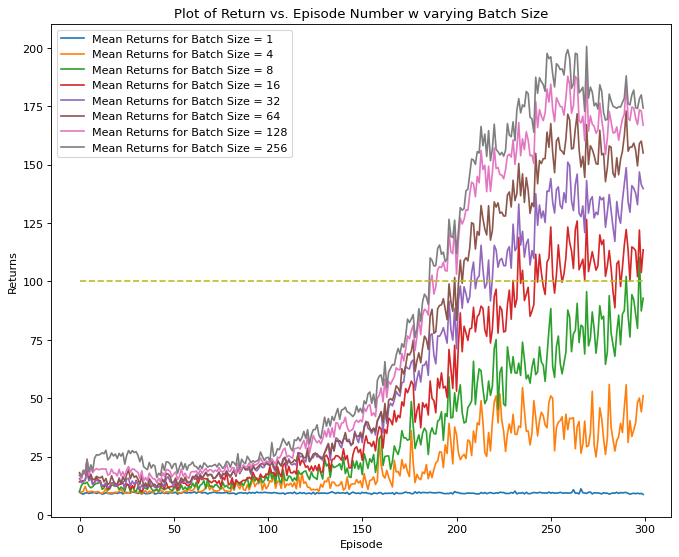

In [ ]:
# Showing hyperparameter edits: Batch Size
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)

MIN_BATCH_SIZE = [1, 4, 8, 16, 32, 64, 128, 256]
for size in MIN_BATCH_SIZE:
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4,24,24,2])
        target_net = DQN([4,24,24,2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), lr = 0.02)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < size:
                    transitions = memory.sample(size)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1

            # Decay Epsilon
            EPSILON = EPSILON*0.99


            # Update the target network, copying all weights and biases in DQN
            if i_episode % 20 == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completed all runs for batch size = ', size, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for Batch Size = {size}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Batch Size")
    plt.legend(loc = 'upper left')

plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  6233
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  10839
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  24280
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  16747
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  14718
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  11666
Starting run 7 of 10
episode  50 / 

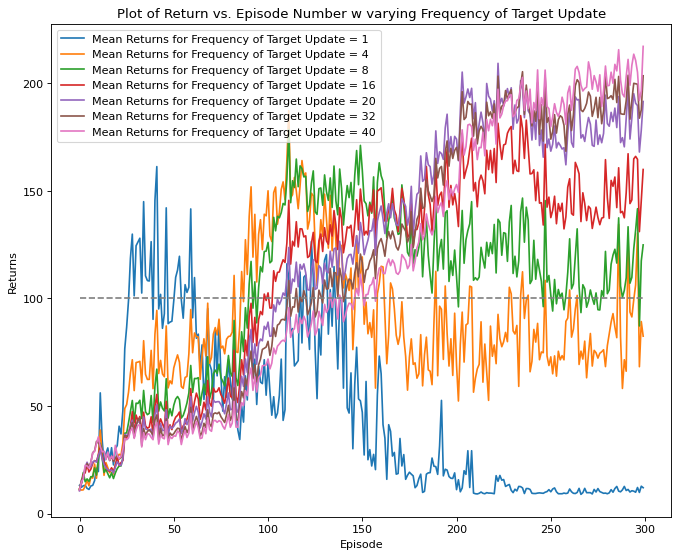

In [ ]:
# Showing hyperparameter edits: Frequency of Target Update
runs_results = []
MIN_BATCH_SIZE = 256

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)

Frequency_Update = [1, 4, 8, 16, 20, 32, 40]
for freq in Frequency_Update:
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4,24,24,2])
        target_net = DQN([4,24,24,2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), lr = 0.02)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < MIN_BATCH_SIZE:
                    transitions = memory.sample(MIN_BATCH_SIZE)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1

            # Decay Epsilon
            EPSILON = EPSILON*0.99


            # Update the target network, copying all weights and biases in DQN
            if i_episode % freq == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completed all runs for frequency = ', freq, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for Frequency of Target Update = {freq}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Frequency of Target Update")
    plt.legend(loc = 'upper left')

plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2785
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2843
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2900
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2807
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2874
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  2799
Starting run 7 of 10
episode  50 / 300
e

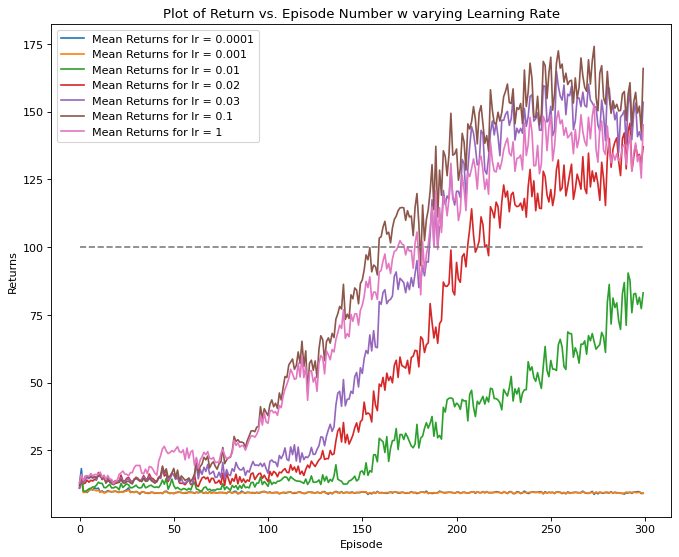

In [ ]:
# Showing hyperparameter edits: LR
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)
MIN_BATCH_SIZE = 256

lr = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.1, 1]
for rate in lr:
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4,24,24,2])
        target_net = DQN([4,24,24,2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), rate)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < MIN_BATCH_SIZE:
                    transitions = memory.sample(MIN_BATCH_SIZE)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1

            # Decay Epsilon
            EPSILON = EPSILON*0.99


            # Update the target network, copying all weights and biases in DQN
            if i_episode % 20 == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completed all runs for lr = ', rate, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for lr = {rate}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Learning Rate")
    plt.legend(loc = 'upper left')

plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  29520
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  34491
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  41163
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  41728
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  24380
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  34915
Starting run 7 of 10
episode  50 /

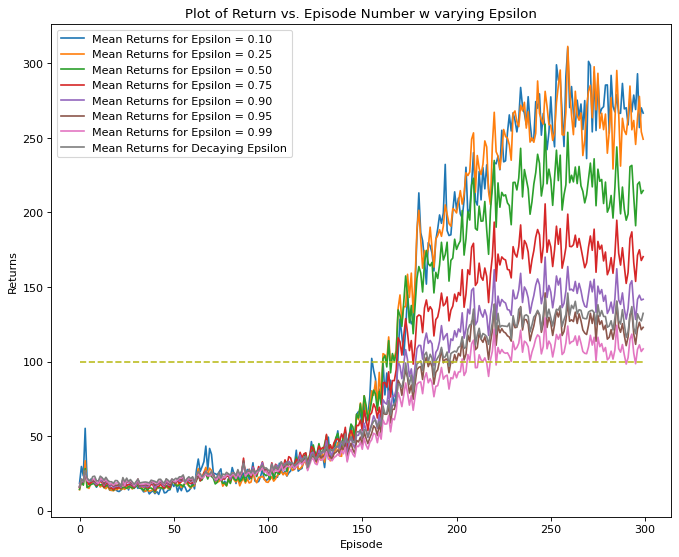

In [ ]:
# Showing hyperparameter edits: EPSILON
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)
MIN_BATCH_SIZE = 256

EPSILONS = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
for EPSILON in EPSILONS:
    for run in range(NUM_RUNS):
        print(f"Starting run {run+1} of {NUM_RUNS}")
        policy_net = DQN([4,24,24,2])
        target_net = DQN([4,24,24,2])
        update_target(target_net, policy_net)
        target_net.eval()

        optimizer = optim.SGD(policy_net.parameters(), 0.02)

        steps_done = 0
        episode_durations = []


        for i_episode in range(300):
            if (i_episode+1) % 50 == 0:
                print("episode ", i_episode+1, "/", 300)


            observation, info = env.reset()
            state = torch.tensor(observation).float()

            done = False
            terminated = False
            t = 0
            while not (done or terminated):

                # Select and perform an action
                action = epsilon_greedy(EPSILON, policy_net, state)
                steps_done += 1
                
                observation, reward, done, terminated, info = env.step(action)
                reward = torch.tensor([reward])
                action = torch.tensor([action])
                next_state = torch.tensor(observation).reshape(-1).float()

                memory.push([state, action, next_state, reward, torch.tensor([done])])

                # Move to the next state
                state = next_state

                # Perform one step of the optimization (on the policy network)
                if not len(memory.buffer) < MIN_BATCH_SIZE:
                    transitions = memory.sample(MIN_BATCH_SIZE)
                    state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                    # Compute loss
                    mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                    # Optimize the model
                    optimizer.zero_grad()
                    mse_loss.backward()
                    optimizer.step()
                
                if done or terminated:
                    episode_durations.append(t + 1)
                t += 1


            # Update the target network, copying all weights and biases in DQN
            if i_episode % 20 == 0: 
                update_target(target_net, policy_net)

        print("steps this episode: ", steps_done)
        runs_results.append(episode_durations)
    print('Completed all runs for EPSILON = ', EPSILON, '...')
    results = torch.tensor(runs_results)
    means = results.float().mean(0)
    
    # Showing the hyperparameter learning curves
    plt.plot(torch.arange(300), means, label = f"Mean Returns for Epsilon = {EPSILON:.2f}")
    plt.ylabel("Returns")
    plt.xlabel("Episode")
    plt.title("Plot of Return vs. Episode Number w varying Decaying Epsilon")
    plt.legend(loc = 'upper left')

# No decay run 
EPSILON = 0.9
for run in range(NUM_RUNS):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    policy_net = DQN([4,24,24,2])
    target_net = DQN([4,24,24,2])
    update_target(target_net, policy_net)
    target_net.eval()

    optimizer = optim.SGD(policy_net.parameters(), 0.02)

    steps_done = 0
    episode_durations = []


    for i_episode in range(300):
        if (i_episode+1) % 50 == 0:
            print("episode ", i_episode+1, "/", 300)


        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(EPSILON, policy_net, state)
            steps_done += 1
            
            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < MIN_BATCH_SIZE:
                transitions = memory.sample(MIN_BATCH_SIZE)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1


        # Update the target network, copying all weights and biases in DQN
        if i_episode % 20 == 0: 
            update_target(target_net, policy_net)
    
        # Decay Epsilon
        EPSILON = EPSILON*0.99

    print("steps this episode: ", steps_done)
    runs_results.append(episode_durations)
print('Completed all runs for Decaying Epsilon')
results = torch.tensor(runs_results)
means = results.float().mean(0)

# Showing the hyperparameter learning curves
plt.plot(torch.arange(300), means, label = f"Mean Returns for Decaying Epsilon")
plt.ylabel("Returns")
plt.xlabel("Episode")
plt.title("Plot of Return vs. Episode Number w varying Epsilon")
plt.legend(loc = 'upper left')
plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.show()

In [ ]:
# OG RUN
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)
MIN_BATCH_SIZE = 256
EPSILON = 0.1

for run in range(NUM_RUNS):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    policy_net = DQN([4,24,24,2])
    target_net = DQN([4,24,24,2])
    update_target(target_net, policy_net)
    target_net.eval()

    optimizer = optim.SGD(policy_net.parameters(), lr=0.1)

    steps_done = 0
    episode_durations = []


    for i_episode in range(300):
        if (i_episode+1) % 50 == 0:
            print("episode ", i_episode+1, "/", 300)


        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(EPSILON, policy_net, state)
            steps_done += 1
            
            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < MIN_BATCH_SIZE:
                transitions = memory.sample(MIN_BATCH_SIZE)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1

        # Decay Epsilon
        EPSILON = EPSILON*0.99


        # Update the target network, copying all weights and biases in DQN
        if i_episode % 20 == 0: 
            update_target(target_net, policy_net)

    print("steps this episode: ", steps_done)
    runs_results.append(episode_durations)
print('Complete')

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  34173
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  62748
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  41919
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  44054
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  33023
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  41099
Starting run 7 of 10
episode  50 /

<Figure size 800x640 with 0 Axes>

In [123]:
# OG RUN
runs_results = []

env = gym.make('CartPole-v1')
memory = ReplayBuffer(50000)
figure(figsize=(10, 8), dpi=80)
MIN_BATCH_SIZE = 256
EPSILON = 0.9

for run in range(NUM_RUNS):
    print(f"Starting run {run+1} of {NUM_RUNS}")
    policy_net = DQN([4,24,24,2])
    target_net = DQN([4,24,24,2])
    update_target(target_net, policy_net)
    target_net.eval()

    optimizer = optim.SGD(policy_net.parameters(), lr=0.02)

    steps_done = 0
    episode_durations = []


    for i_episode in range(300):
        if (i_episode+1) % 50 == 0:
            print("episode ", i_episode+1, "/", 300)


        observation, info = env.reset()
        state = torch.tensor(observation).float()

        done = False
        terminated = False
        t = 0
        while not (done or terminated):

            # Select and perform an action
            action = epsilon_greedy(EPSILON, policy_net, state)
            steps_done += 1
            
            observation, reward, done, terminated, info = env.step(action)
            reward = torch.tensor([reward])
            action = torch.tensor([action])
            next_state = torch.tensor(observation).reshape(-1).float()

            memory.push([state, action, next_state, reward, torch.tensor([done])])

            # Move to the next state
            state = next_state

            # Perform one step of the optimization (on the policy network)
            if not len(memory.buffer) < MIN_BATCH_SIZE:
                transitions = memory.sample(MIN_BATCH_SIZE)
                state_batch, action_batch, nextstate_batch, reward_batch, dones = (torch.stack(x) for x in zip(*transitions))
                # Compute loss
                mse_loss = loss(policy_net, target_net, state_batch, action_batch, reward_batch, nextstate_batch, dones)
                # Optimize the model
                optimizer.zero_grad()
                mse_loss.backward()
                optimizer.step()
            
            if done or terminated:
                episode_durations.append(t + 1)
            t += 1


        # Update the target network, copying all weights and biases in DQN
        if i_episode % 20 == 0: 
            update_target(target_net, policy_net)
        
        # Decaying Epsilon
        EPSILON =EPSILON*0.99

    print("steps this episode: ", steps_done)
    runs_results.append(episode_durations)
print('Complete')

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  45065
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  38609
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  44029
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  28006
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  47776
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
steps this episode:  32446
Starting run 7 of 10
episode  50 /

<Figure size 800x640 with 0 Axes>

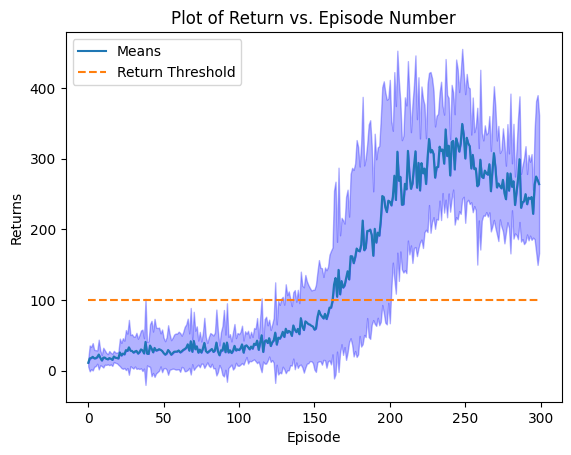

In [124]:
# Plotting the learning curve - 0.1 epsilon?....
# Placeholder plot, you are free to modify it
 
results = torch.tensor(runs_results)
means = results.float().mean(0)
stds = results.float().std(0)

plt.plot(torch.arange(300), means, label = "Means")
plt.plot(torch.arange(300), np.full(300, 100), label = "Return Threshold", linestyle='--')
plt.ylabel("Returns")
plt.xlabel("Episode")
plt.title("Plot of Return vs. Episode Number")
plt.legend(loc = 'upper left')

plt.fill_between(np.arange(300), means, means-stds, alpha=0.3, color='b', label = "Standard Deviation")
plt.fill_between(np.arange(300), means, means+stds, alpha=0.3, color='b')
plt.show()

axs:  [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


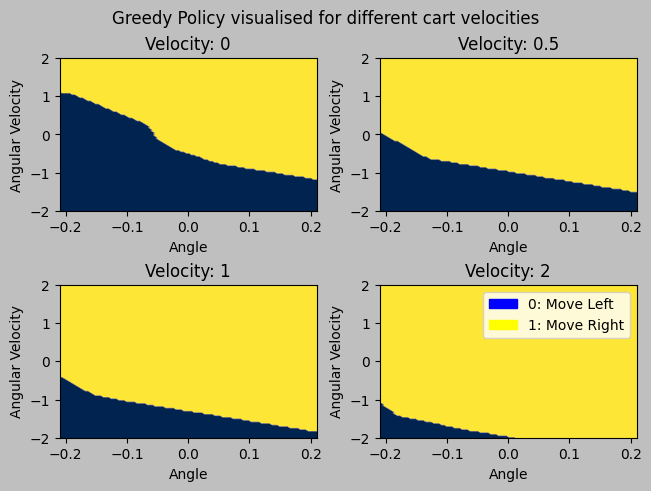

In [125]:
# Visualising the greedy Q-values for a stationary cart in the middle of the track
# 2D plot showing policy as a function of pole angle and angular velocity (omega)

# This plots the policy and Q values according to the network currently
# stored in the variable "policy_net"

# All visualisations provided here are placeholders and you can modify these plots

# Make sure to include appropriate labels and/or legends when presenting your plot
# Creating the figure with a constrained layout to avoid overlapping, setting the resolution and face color
fig, axs = plt.subplots(2, 2, constrained_layout=True, dpi=100,facecolor='0.75')
cart_velocities = [0, 0.5, 1, 2]

print("axs: ", axs)


# policy_net = DQN([4,24,24, 2])   # randomly initialised, replace with your trained DQN
q = False    # whether q values or greedy policy is visualised

angle_range = .2095 # you may modify this range
omega_range = 2    # Angluar velocity range, you may modify this range

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)

fig.suptitle('Greedy Policy visualised for different cart velocities')
for plot_index, velocity in enumerate(cart_velocities):
    ax = axs.flat[plot_index]

    greedy_q_array = torch.zeros((angle_samples, omega_samples))
    policy_array = torch.zeros((angle_samples, omega_samples))

    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., velocity, angle, omega])
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                greedy_q_array[i, j] = q_vals[greedy_action]
                policy_array[i, j] = greedy_action
        if q:
            ax.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
        else:
            ax.contourf(angles, omegas, policy_array.T, cmap='cividis', levels=100)
        
        ax.set_title(f'Velocity: {velocity}')
        ax.set_xlabel('Angle')
        ax.set_ylabel('Angular Velocity')


# for ax, velocity in zip(axs.flat, cart_velocities):
#     plot_dqn_results(ax, velocity, policy_net, q)  # This function needs to be defined

# plt.show()

# Visualising the greedy policy for a stationary cart in the middle of the track
blue_patch = mpatches.Patch(color='blue', label='0: Move Left')
yellow_patch = mpatches.Patch(color='yellow', label='1: Move Right')
plt.legend(handles=[blue_patch, yellow_patch])
plt.show()



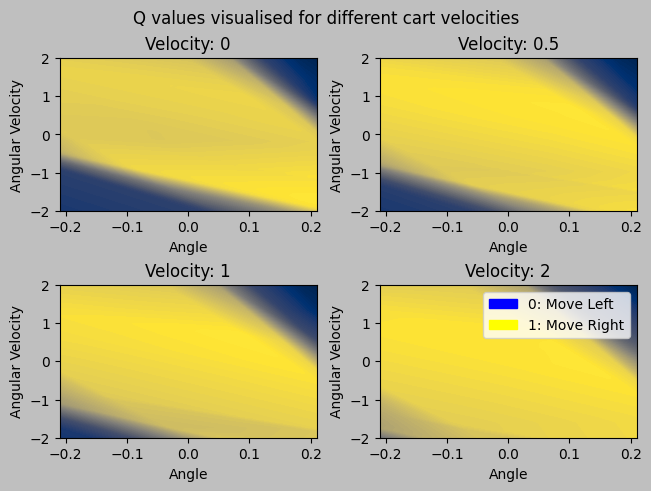

In [126]:
# Visualising the greedy Q-values for a stationary cart in the middle of the track
# 2D plot showing policy as a function of pole angle and angular velocity (omega)

# This plots the policy and Q values according to the network currently
# stored in the variable "policy_net"

# All visualisations provided here are placeholders and you can modify these plots

# Make sure to include appropriate labels and/or legends when presenting your plot
# Creating the figure with a constrained layout to avoid overlapping, setting the resolution and face color
fig, axs = plt.subplots(2, 2, constrained_layout=True, dpi=100,facecolor='0.75')
cart_velocities = [0, 0.5, 1, 2]


# policy_net = DQN([4,24,24, 2])   # randomly initialised, replace with your trained DQN
q = True    # whether q values or greedy policy is visualised

angle_range = .2095 # you may modify this range
omega_range = 2     # Angluar velocity range, you may modify this range

angle_samples = 100
omega_samples = 100
angles = torch.linspace(angle_range, -angle_range, angle_samples)
omegas = torch.linspace(-omega_range, omega_range, omega_samples)
blue_patch = mpatches.Patch(color='blue', label='0: Move Left')
yellow_patch = mpatches.Patch(color='yellow', label='1: Move Right')

fig.suptitle('Q values visualised for different cart velocities')
for plot_index, velocity in enumerate(cart_velocities):
    ax = axs.flat[plot_index]

    greedy_q_array = torch.zeros((angle_samples, omega_samples))
    policy_array = torch.zeros((angle_samples, omega_samples))

    for i, angle in enumerate(angles):
        for j, omega in enumerate(omegas):
            state = torch.tensor([0., velocity, angle, omega])
            with torch.no_grad():
                q_vals = policy_net(state)
                greedy_action = q_vals.argmax()
                greedy_q_array[i, j] = q_vals[greedy_action]
                policy_array[i, j] = greedy_action
        if q:
            cs = ax.contourf(angles, omegas, greedy_q_array.T, cmap='cividis', levels=100)
        else:
            cs = ax.contourf(angles, omegas, policy_array.T, cmap='cividis')
        
        ax.set_title(f'Velocity: {velocity}')
        ax.set_xlabel('Angle')
        ax.set_ylabel('Angular Velocity')
        


# Visualising the greedy policy for a stationary cart in the middle of the track
blue_patch = mpatches.Patch(color='blue', label='0: Move Left')
yellow_patch = mpatches.Patch(color='yellow', label='1: Move Right')
plt.legend(handles=[blue_patch, yellow_patch])
plt.show()

